### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250

### Load the Dataset

In [2]:
df = pd.read_csv(r'C:\Users\umair\OneDrive\Desktop\My Files\ExcelR\Assignments\Multi Linear Regression\50_Startups.csv')
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


### Perform Data Analysis

In [3]:
df = df.drop(columns='State')

In [4]:
df=df.rename({"R&D Spend":'RnD',"Administration":'admin',"Marketing Spend":'marketing',"State":'state',"Profit":'profit'},axis=1)


In [5]:
df.head()

,RnD,admin,marketing,profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [6]:
df.describe()

,RnD,admin,marketing,profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   RnD        50 non-null     float64
 1   admin      50 non-null     float64
 2   marketing  50 non-null     float64
 3   profit     50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


In [8]:
df.isna().sum()

RnD          0
admin        0
marketing    0
profit       0
dtype: int64

In [9]:
corr = df.corr()
corr

,RnD,admin,marketing,profit
RnD,1.000000,0.241955,0.724248,0.972900
admin,0.241955,1.000000,-0.032154,0.200717
marketing,0.724248,-0.032154,1.000000,0.747766
profit,0.972900,0.200717,0.747766,1.000000


<Axes: >

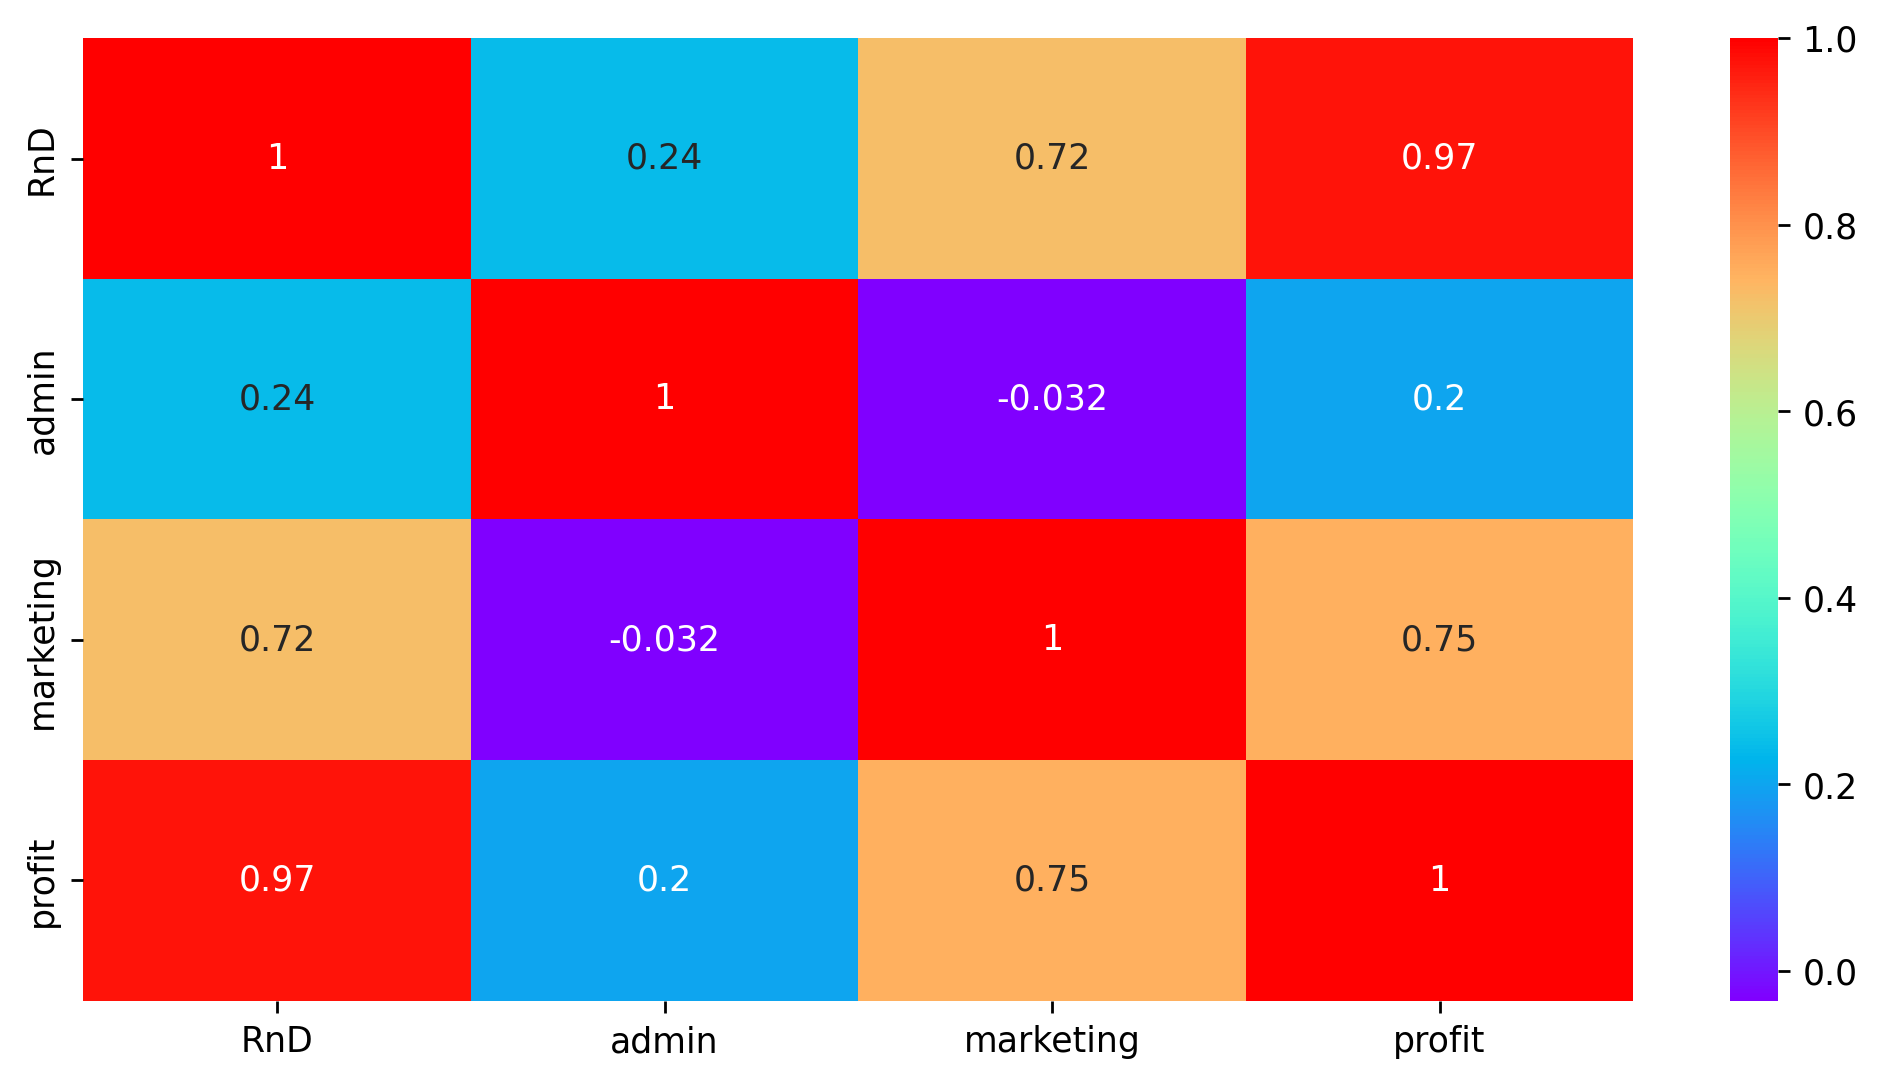

In [10]:
sns.heatmap(corr,annot=True,cmap='rainbow')

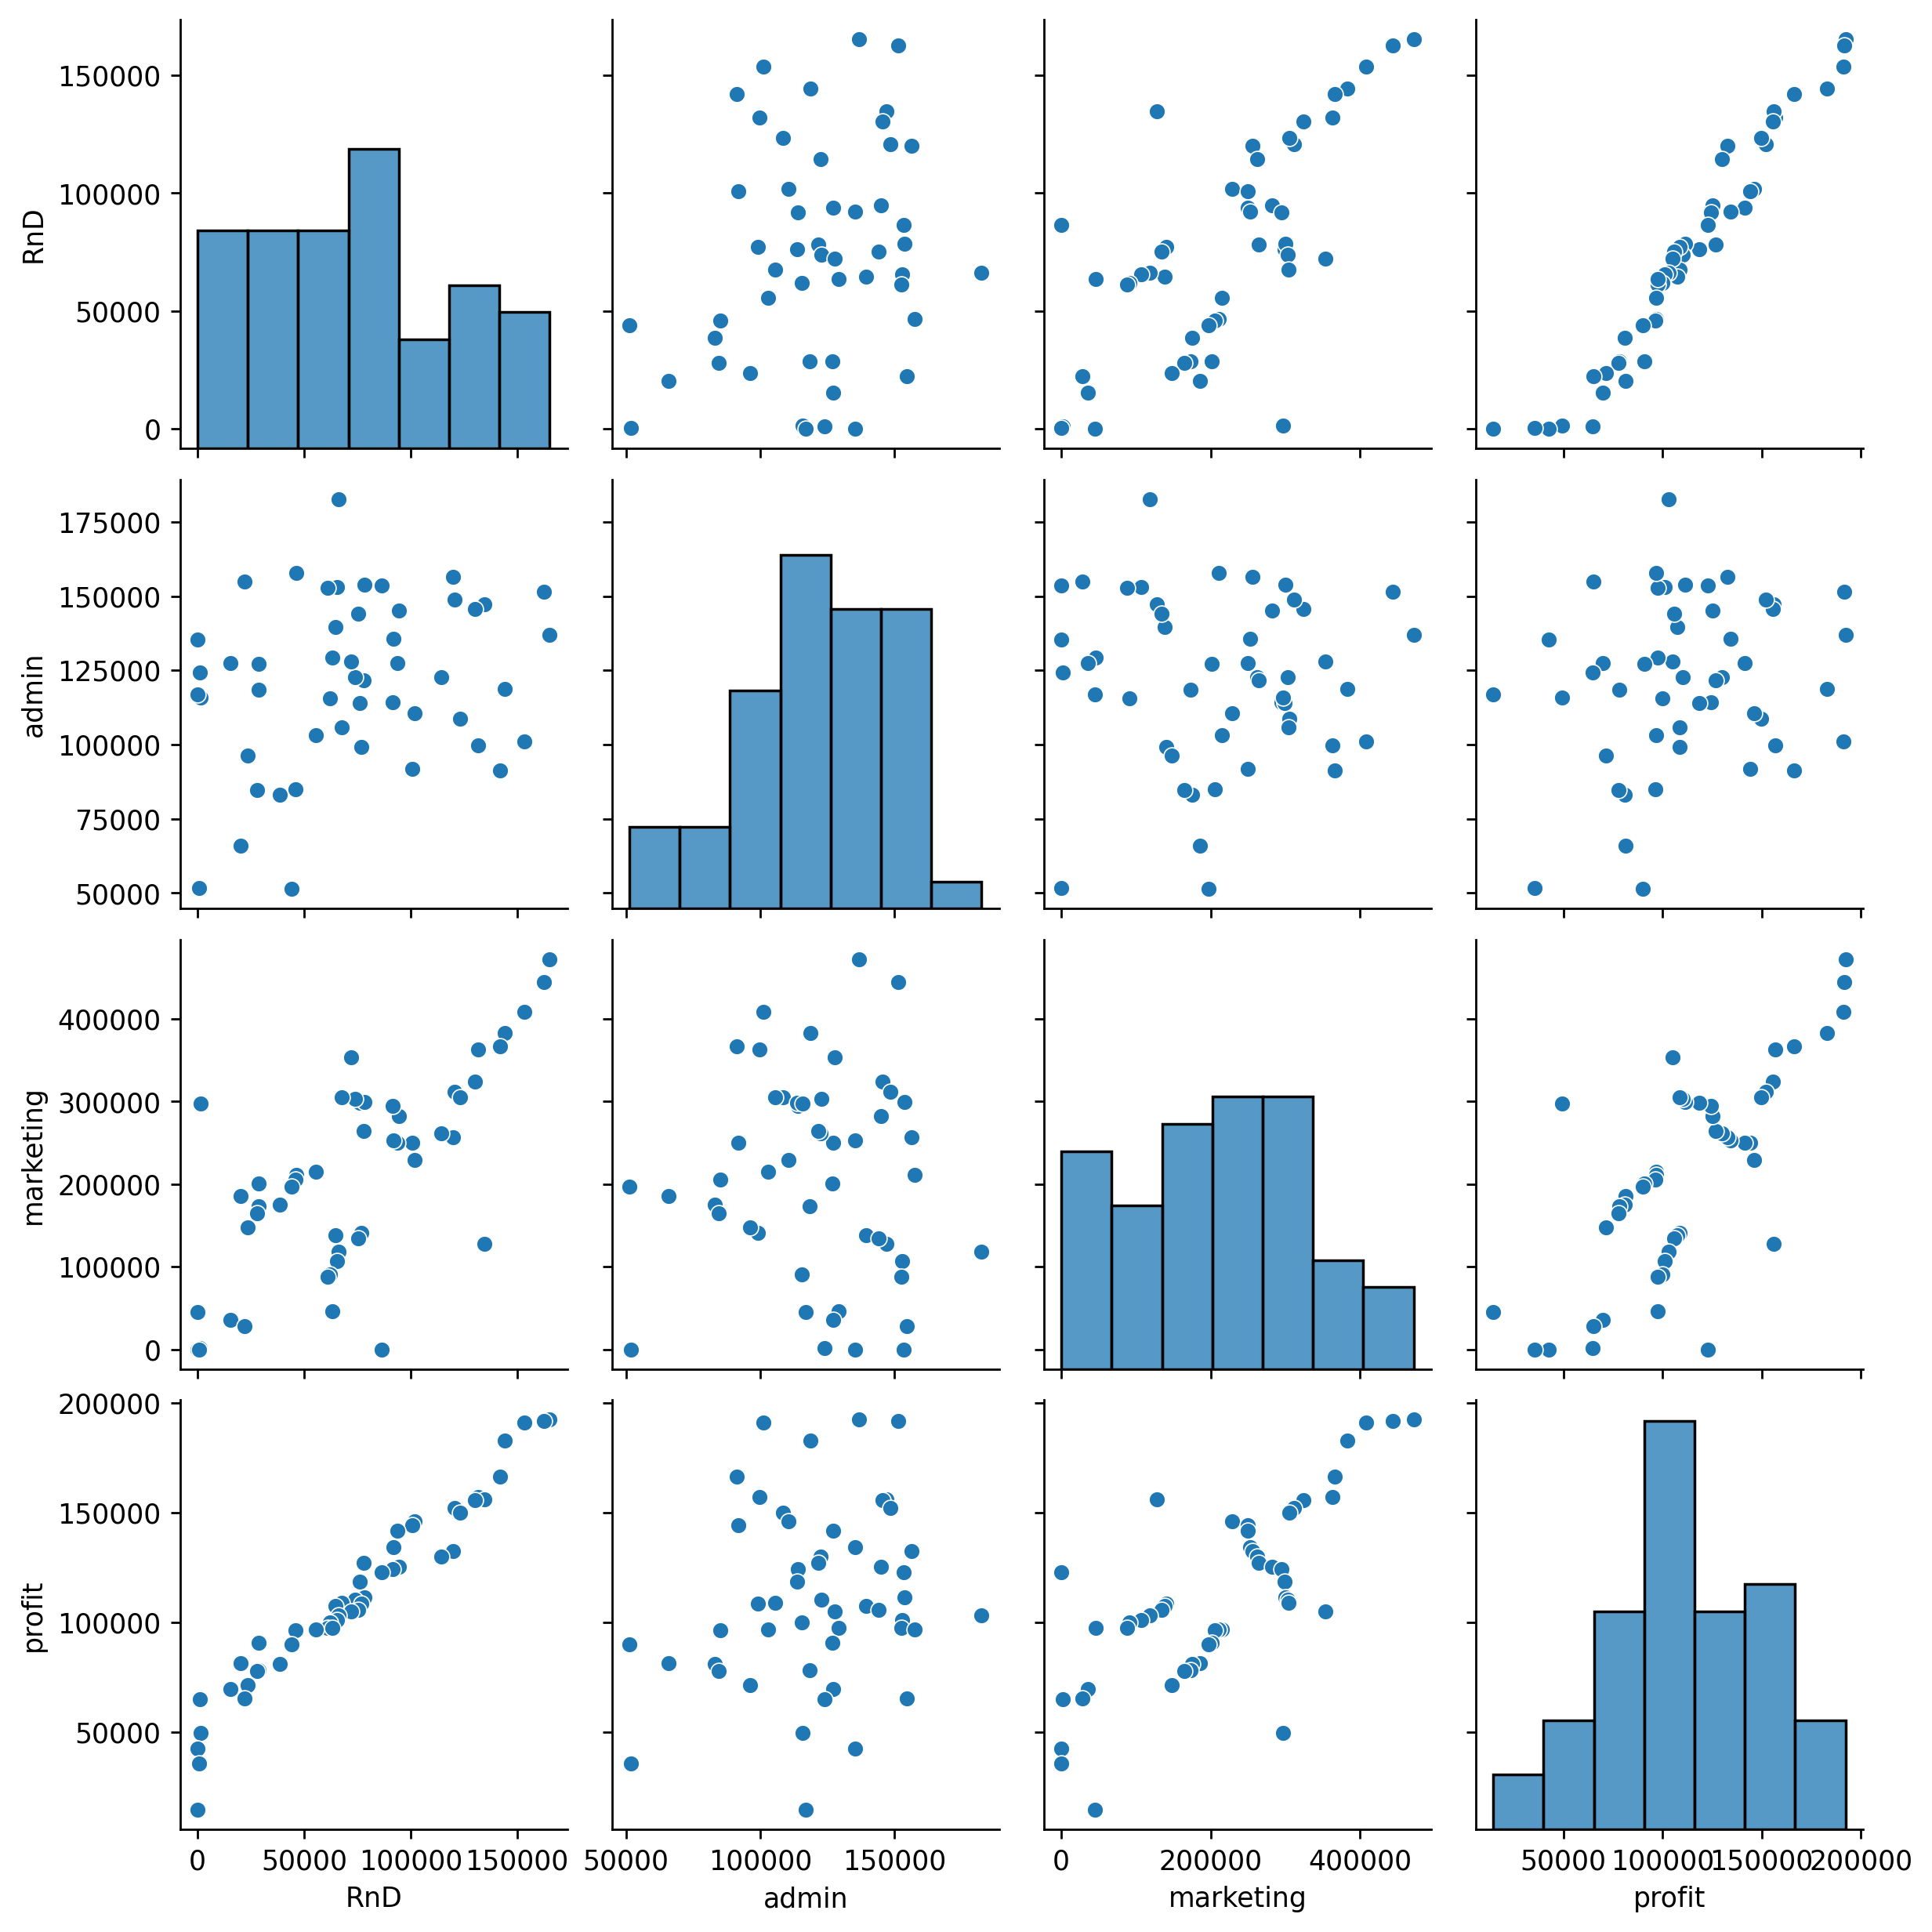

In [11]:
sns.pairplot(df)

### Model Building

In [12]:
model = smf.ols('profit~RnD+admin+marketing',data=df).fit()

In [13]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sat, 29 Jul 2023   Prob (F-statistic):           4.53e-30
Time:                        03:49:47   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RnD            0.8057      0.045     17.846      0.000       0.715       0.897
admin         -0.0268      0.051     -0.526      0.602      -0.130       0.076
marketing      0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
model.params

Intercept    50122.192990
RnD              0.805715
admin           -0.026816
marketing        0.027228
dtype: float64

In [15]:
model.tvalues

Intercept     7.626218
RnD          17.846374
admin        -0.525507
marketing     1.655077
dtype: float64

In [16]:
model.pvalues

Intercept    1.057379e-09
RnD          2.634968e-22
admin        6.017551e-01
marketing    1.047168e-01
dtype: float64

In [17]:
model.rsquared,model.rsquared_adj

(0.9507459940683246, 0.9475337762901719)

In [18]:
np.sqrt(model.mse_resid)

9232.33483700269

### Calculation of VIF

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [20]:
vif = pd.DataFrame()

vif['VIF'] = [variance_inflation_factor(df.values,i) for i in range(len(df.columns))]
vif['features'] = df.columns
vif

,VIF,features
0,30.156046,RnD
1,13.396558,admin
2,9.845142,marketing
3,79.627990,profit


# Model Validation

In [21]:
import statsmodels.api as sm

In [22]:
model.resid

0      -259.422890
1      2635.291768
2      8903.110904
3      9205.289974
4     -5951.574183
5     -6589.660571
6     -1991.586669
7     -4268.763048
8       470.070301
9     -5124.724110
10    10612.933633
11     8685.687039
12    12447.465818
13     6819.358337
14   -16945.996335
15   -16318.119985
16    10077.524599
17    -4822.077208
18    -4747.326806
19     7141.643633
20     1834.360769
21    -6006.431640
22    -4354.731717
23    -1262.625221
24    -4810.926113
25     5166.614935
26    -4867.035350
27    -9399.761457
28     1622.353995
29     -790.343452
30      485.217064
31     -204.296276
32    -1573.488985
33    -1136.087805
34     7673.526259
35     5967.910432
36    15422.015415
37      329.602292
38    11531.629352
39    -2723.251977
40     3423.956009
41     2996.273761
42      878.078179
43     9591.940037
44      588.975084
45    17275.430313
46    -6675.456853
47    -3930.858983
48   -13497.978158
49   -33533.734111
dtype: float64

### Test for Normality of Residuals (Q-Q Plot)

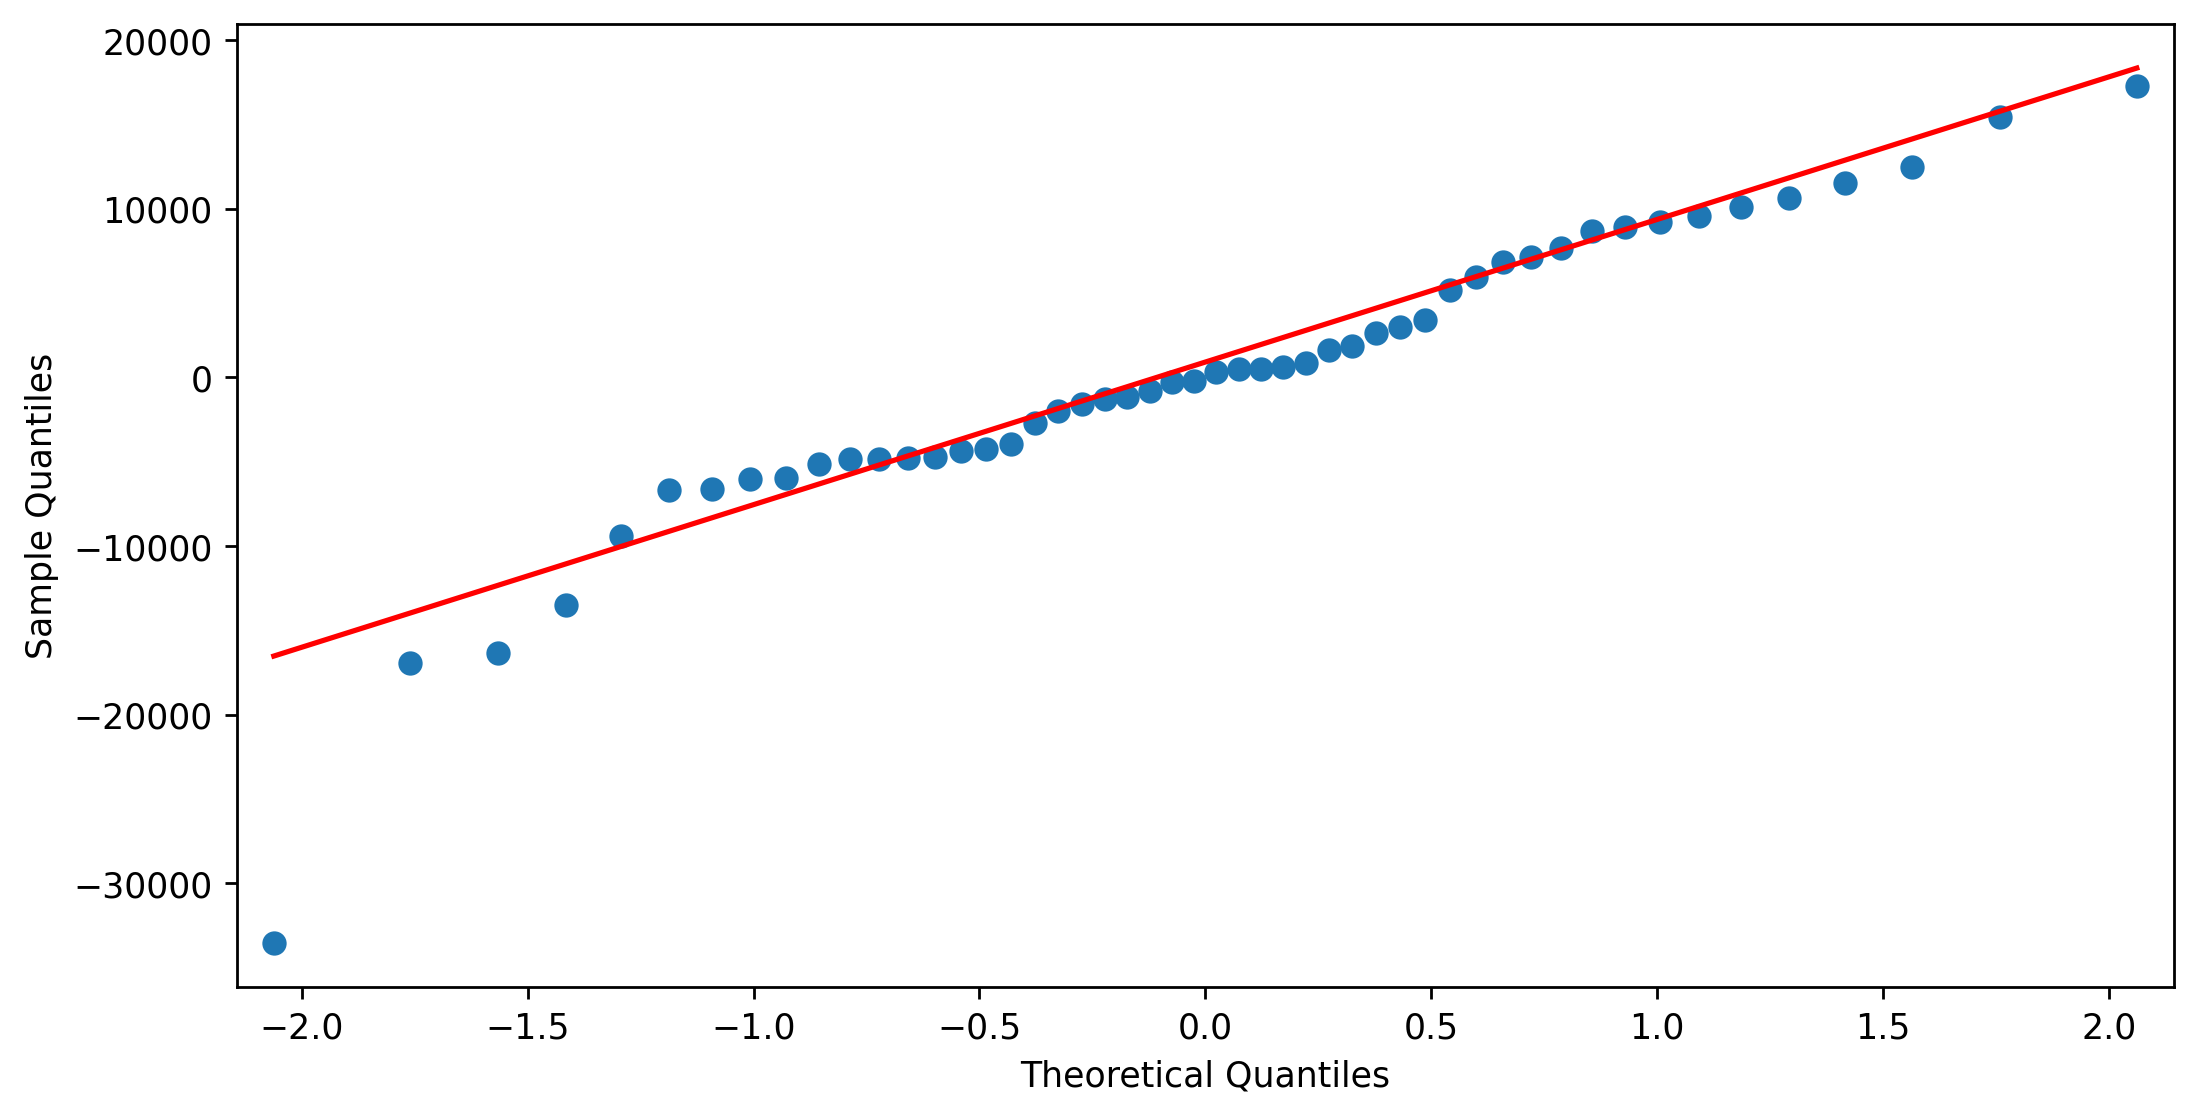

In [23]:
sm.qqplot(model.resid,line='q');

### Residual Plot for Homoscedasticity

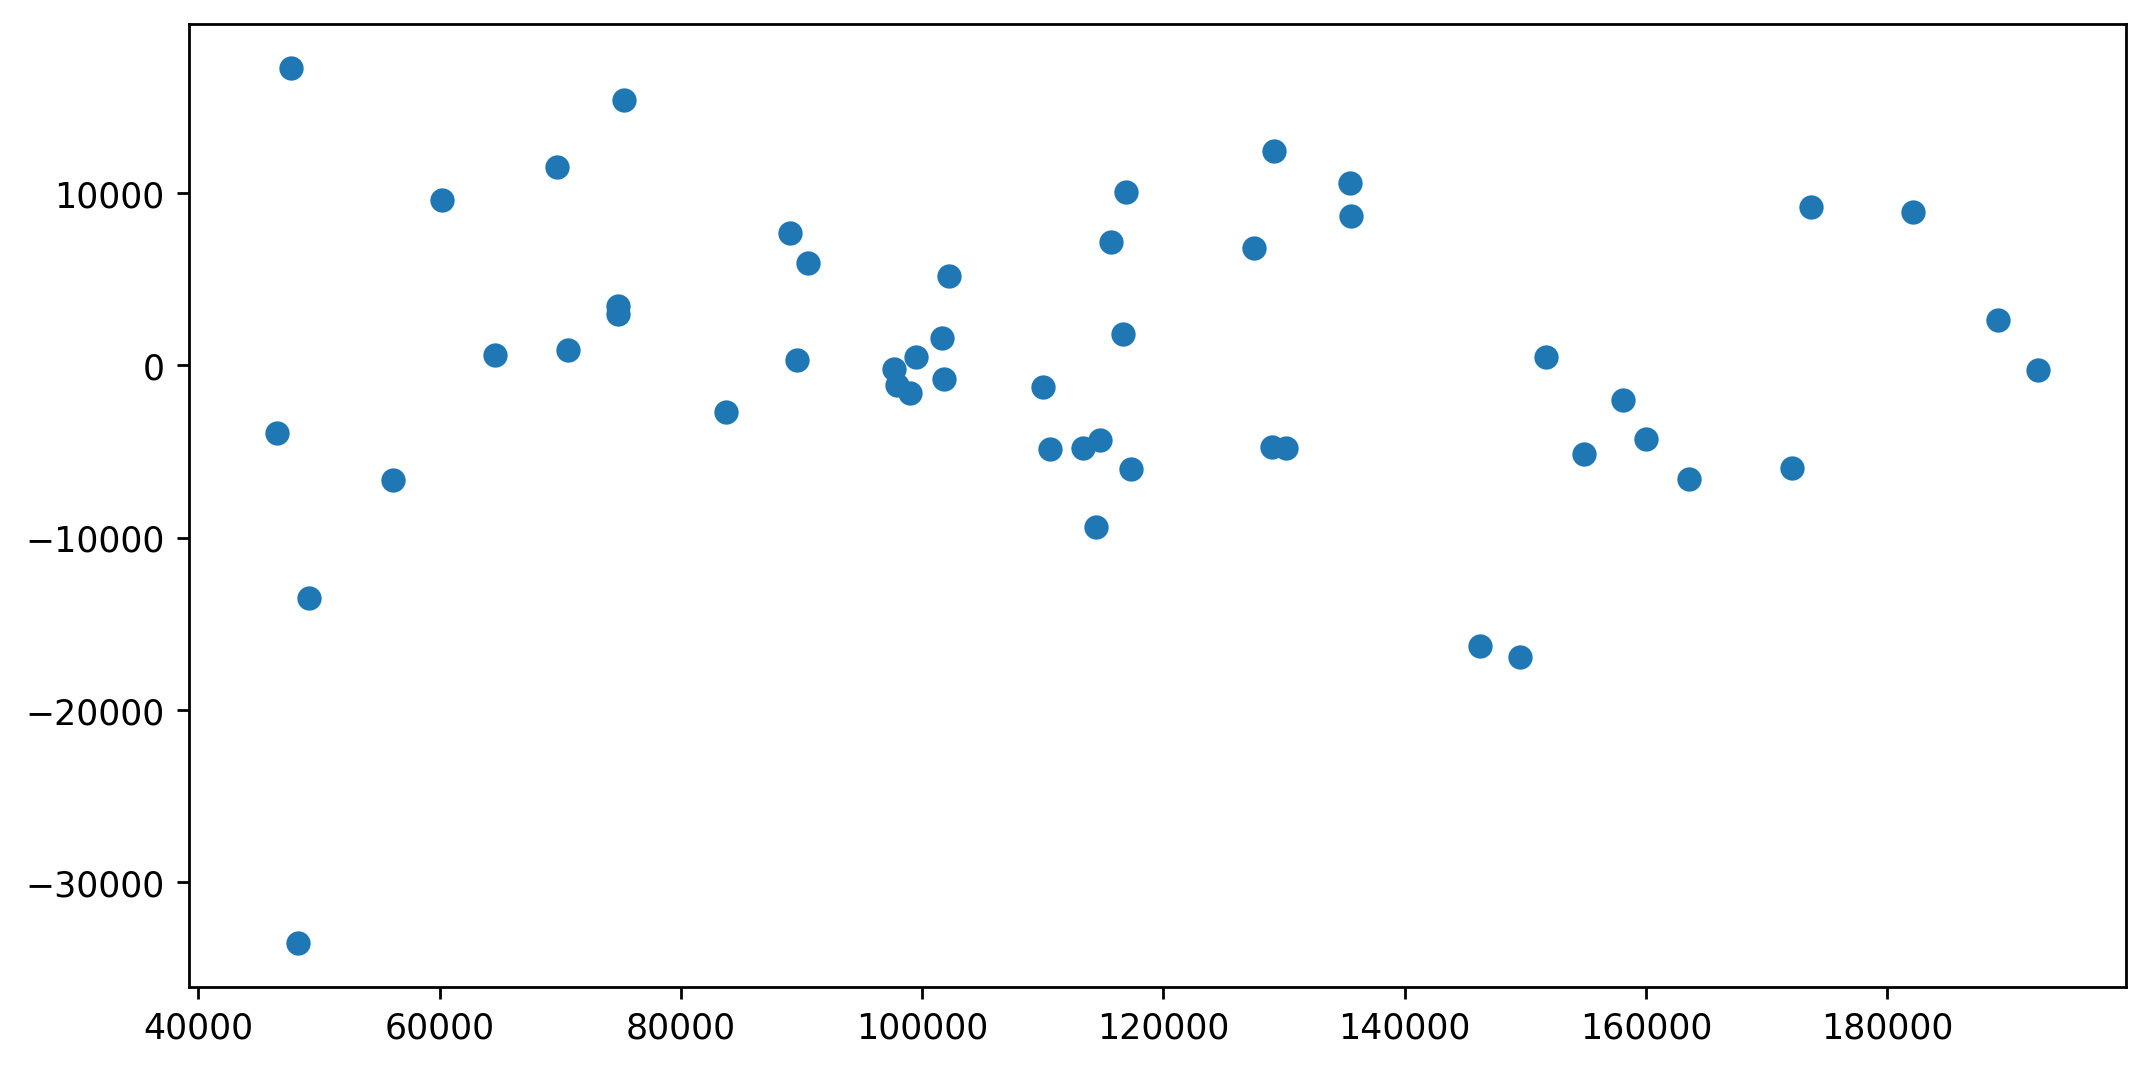

In [24]:
plt.scatter(model.fittedvalues,model.resid)

### Residual Vs Regressors

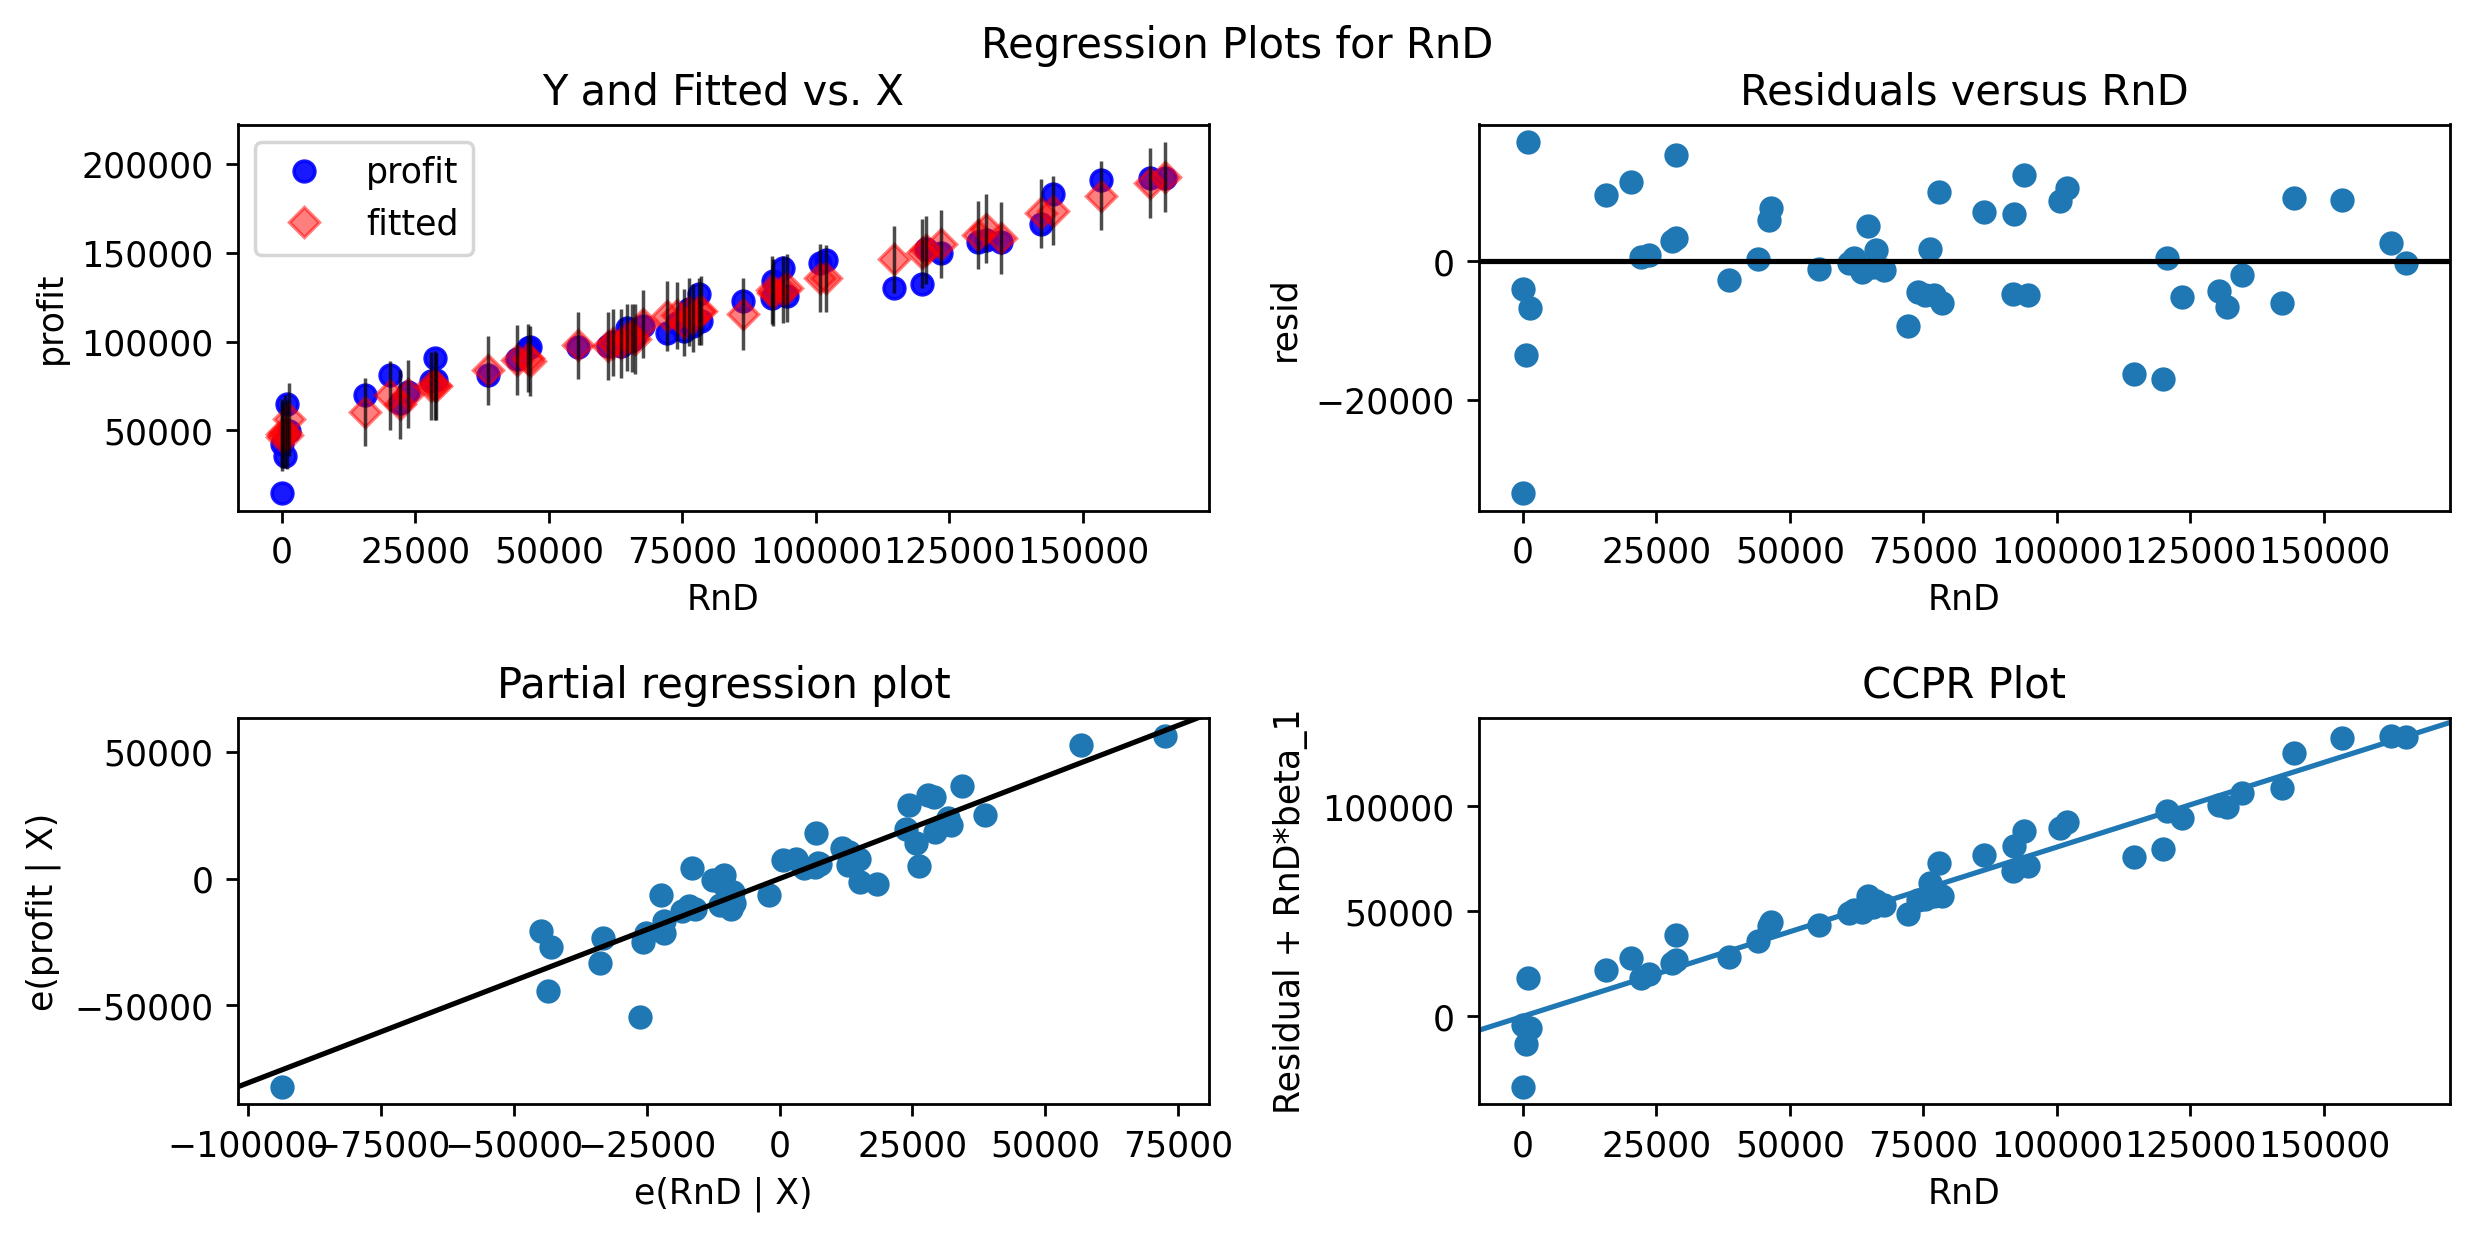

In [25]:
sm.graphics.plot_regress_exog(model, "RnD");

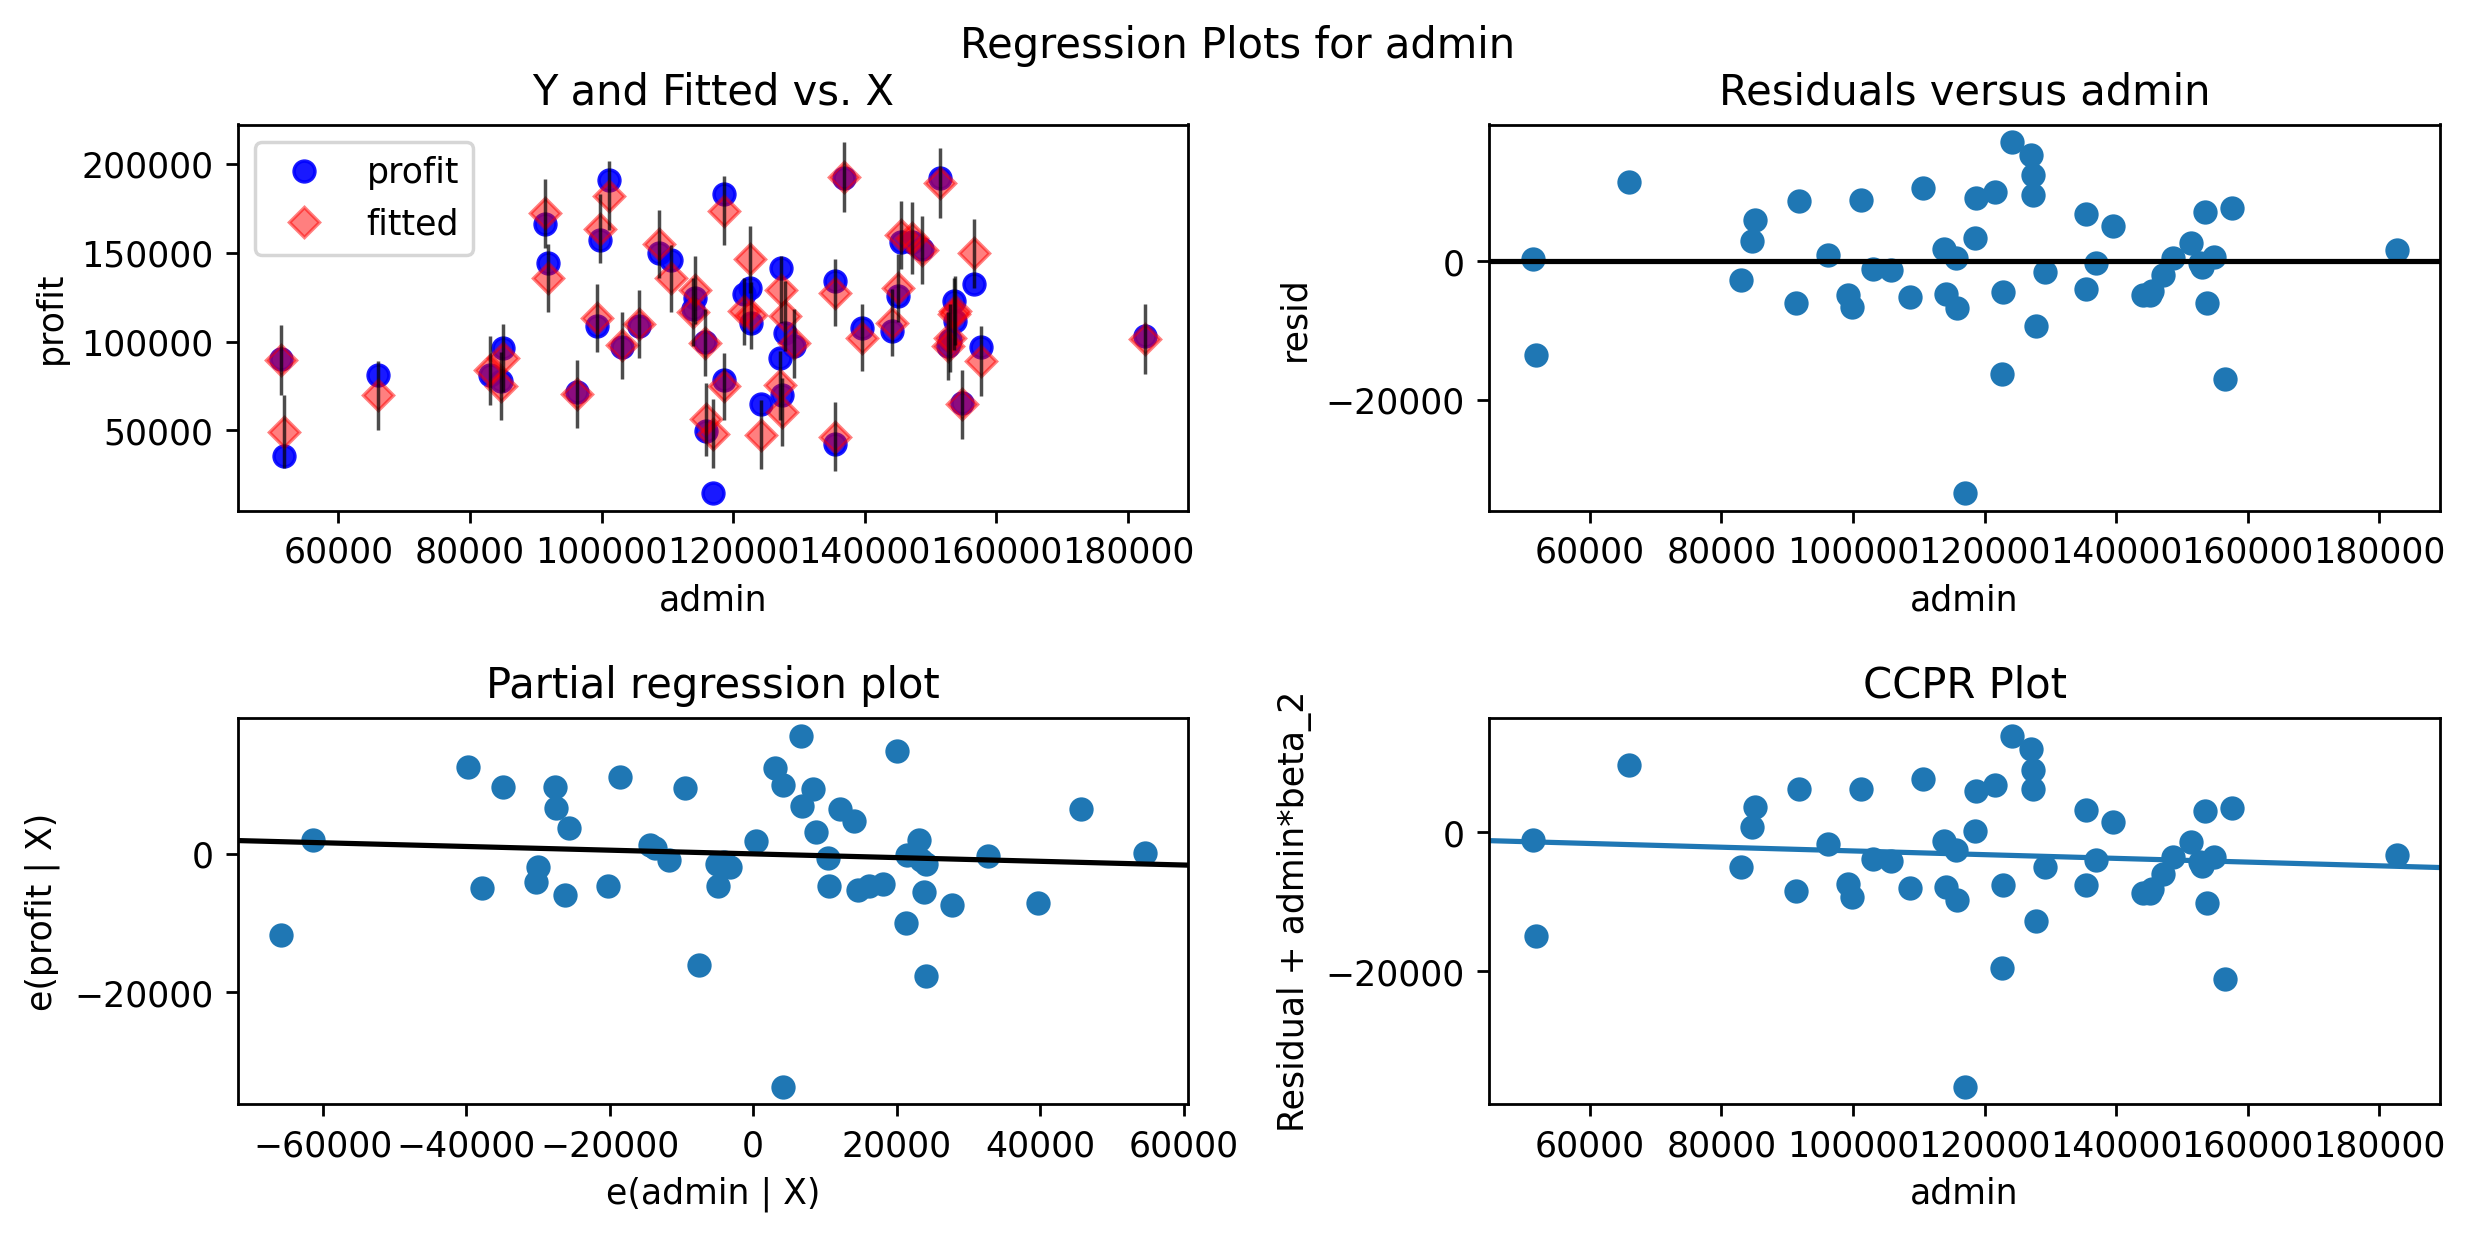

In [26]:
sm.graphics.plot_regress_exog(model, "admin");

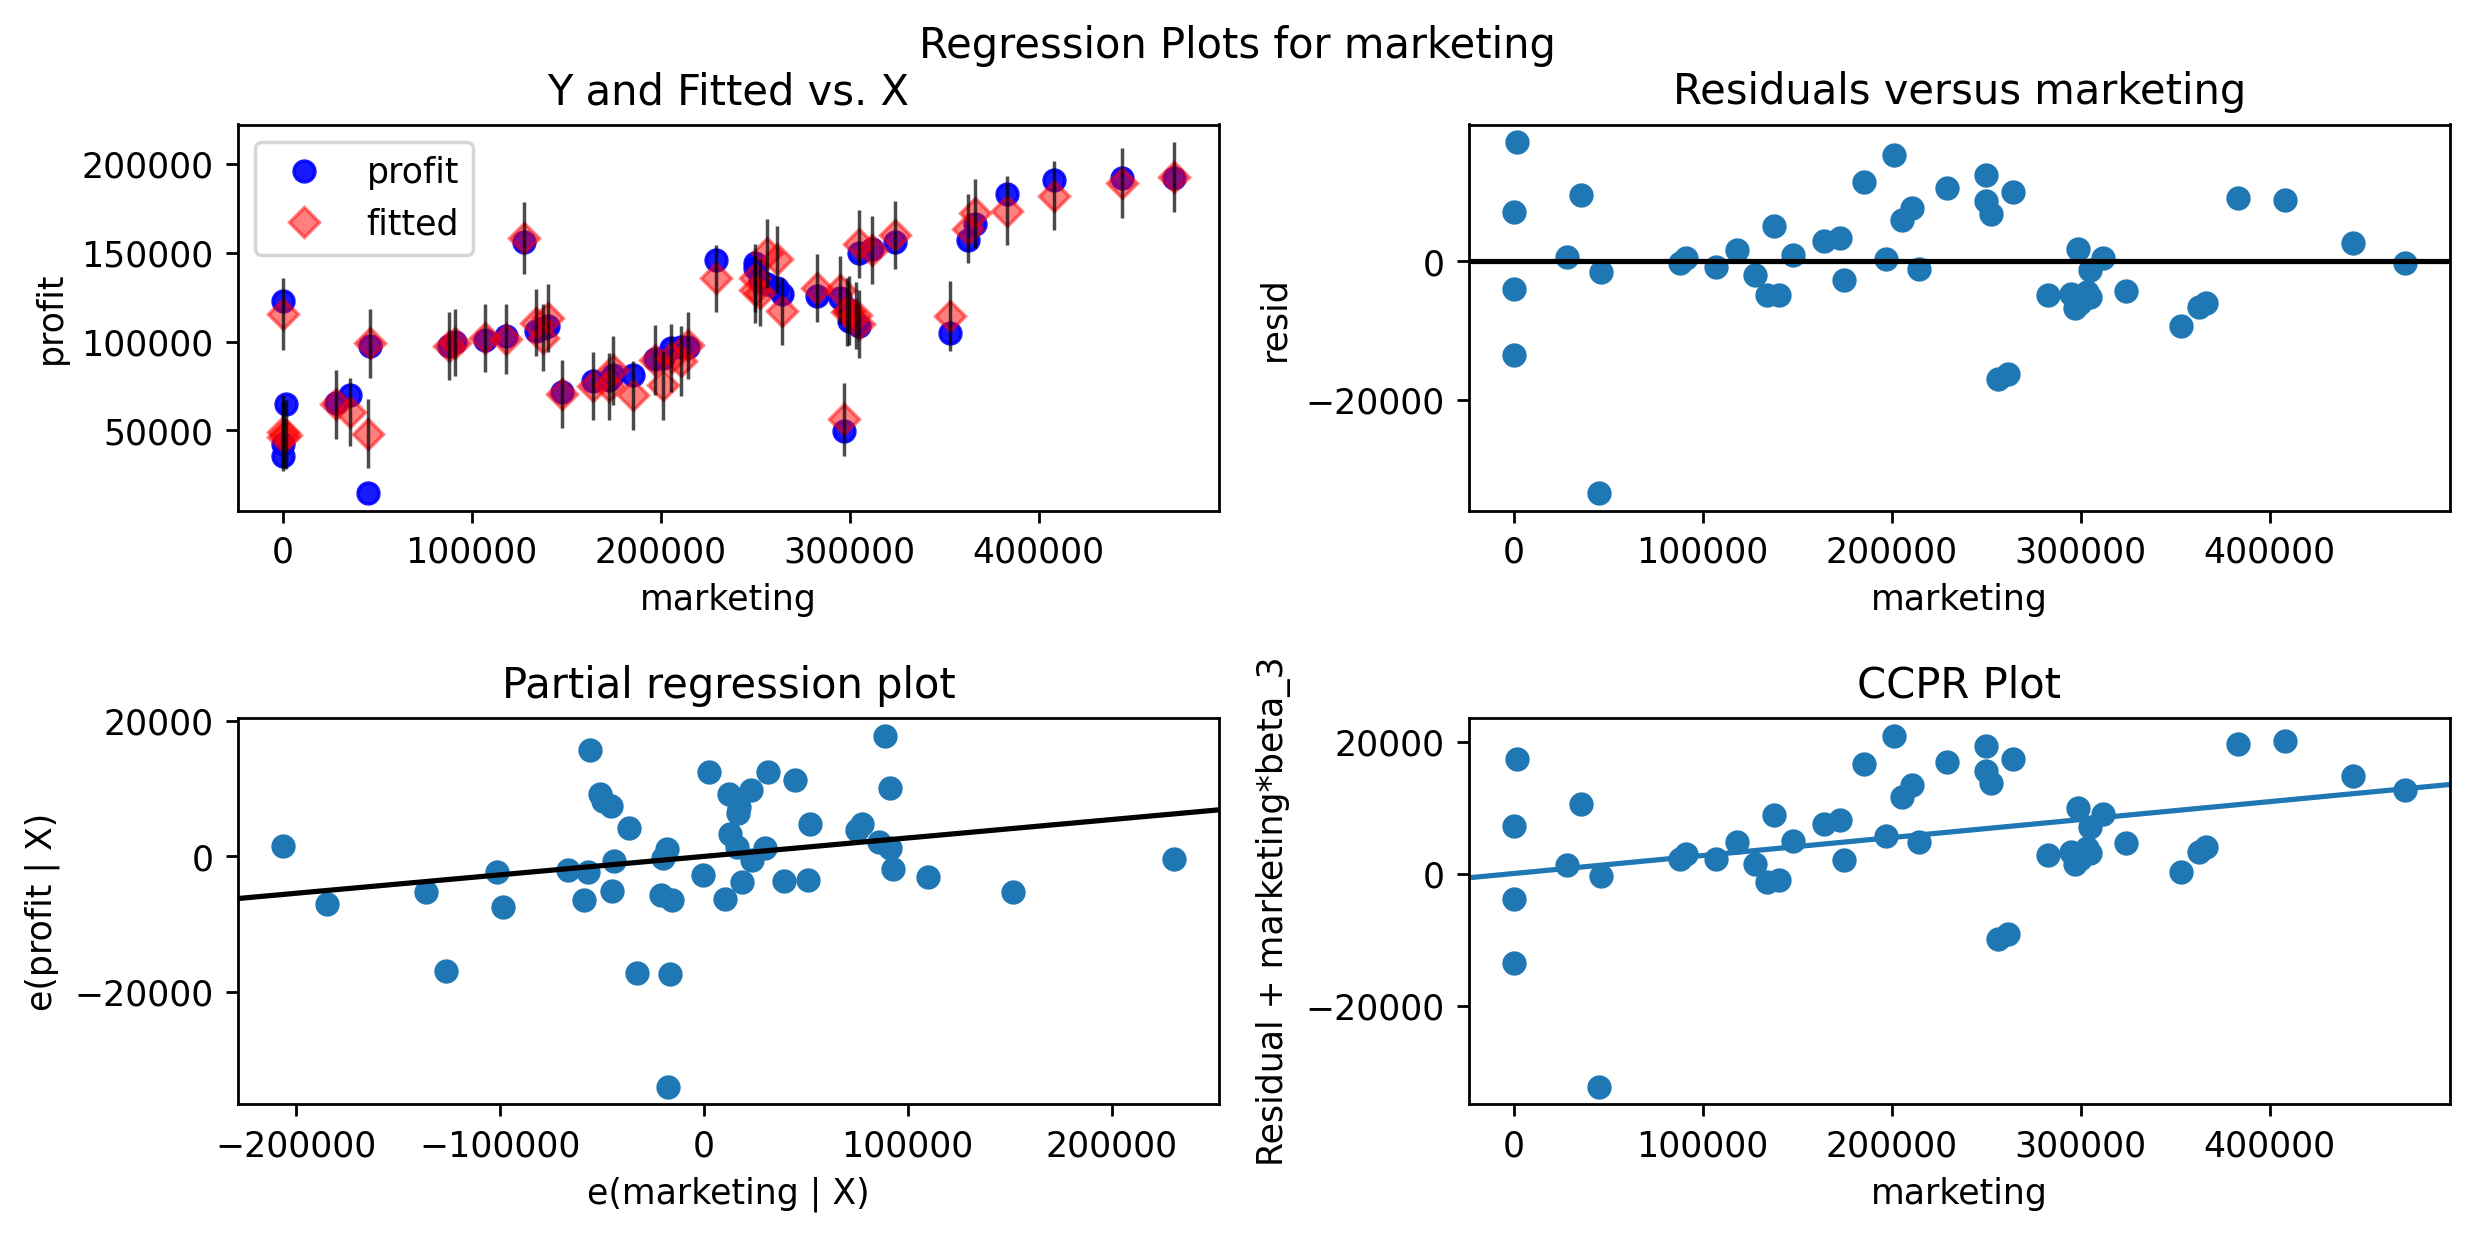

In [27]:
sm.graphics.plot_regress_exog(model, "marketing");

### Transformations

In [28]:
model1 = smf.ols('np.sqrt(profit)~np.sqrt(RnD+admin+marketing)', data = df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.sqrt(profit)   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     126.9
Date:                Sat, 29 Jul 2023   Prob (F-statistic):           4.47e-15
Time:                        03:49:50   Log-Likelihood:                -246.75
No. Observations:                  50   AIC:                             497.5
Df Residuals:                      48   BIC:                             501.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                           76.1145     22.924      3.320      0.002      30.022     122.207
np.sqrt(RnD + admin + marketing)     0.4052      0.036     11.264      0.000       0.333       0.478
==============================================================================
Omnibus:                       22.760   Durbin-Watson:                   1.679
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.180
Skew:                          -1.312   Prob(JB):                     2.55e-10
Kurtosis:                       6.784   Cond. No.                     3.01e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
model2 = smf.ols('np.cbrt(profit)~np.cbrt(RnD+admin+marketing)', data = df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.cbrt(profit)   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     114.6
Date:                Sat, 29 Jul 2023   Prob (F-statistic):           2.58e-14
Time:                        03:49:50   Log-Likelihood:                -133.68
No. Observations:                  50   AIC:                             271.4
Df Residuals:                      48   BIC:                             275.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                           11.3725      3.401      3.344      0.002       4.535      18.210
np.cbrt(RnD + admin + marketing)     0.4966      0.046     10.707      0.000       0.403       0.590
==============================================================================
Omnibus:                       31.349   Durbin-Watson:                   1.707
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               82.543
Skew:                          -1.696   Prob(JB):                     1.19e-18
Kurtosis:                       8.302   Cond. No.                         493.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
model3 = smf.ols('np.log(profit)~np.log(RnD+admin+marketing)', data = df).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(profit)   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     85.69
Date:                Sat, 29 Jul 2023   Prob (F-statistic):           2.98e-12
Time:                        03:49:50   Log-Likelihood:                -6.3476
No. Observations:                  50   AIC:                             16.70
Df Residuals:                      48   BIC:                             20.52
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                           2.1394      1.017      2.105      0.041       0.096       4.183
np.log(RnD + admin + marketing)     0.7339      0.079      9.257      0.000       0.574       0.893
==============================================================================
Omnibus:                       52.308   Durbin-Watson:                   1.740
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              296.206
Skew:                          -2.664   Prob(JB):                     4.78e-65
Kurtosis:                      13.667   Cond. No.                         331.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
errors = pd.DataFrame({
    'model':[model.rsquared],
    'model1':[model1.rsquared],
    'model2':[model2.rsquared],
    'model3':[model3.rsquared]
})
r2_value_table = pd.DataFrame(errors)
r2_value_table.T


,0
model,0.950746
model1,0.725505
model2,0.704871
model3,0.640968


### Model Deletion Diagnostics

In [32]:
inf = model.get_influence()
c,p = inf.cooks_distance

In [33]:
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

<StemContainer object of 3 artists>

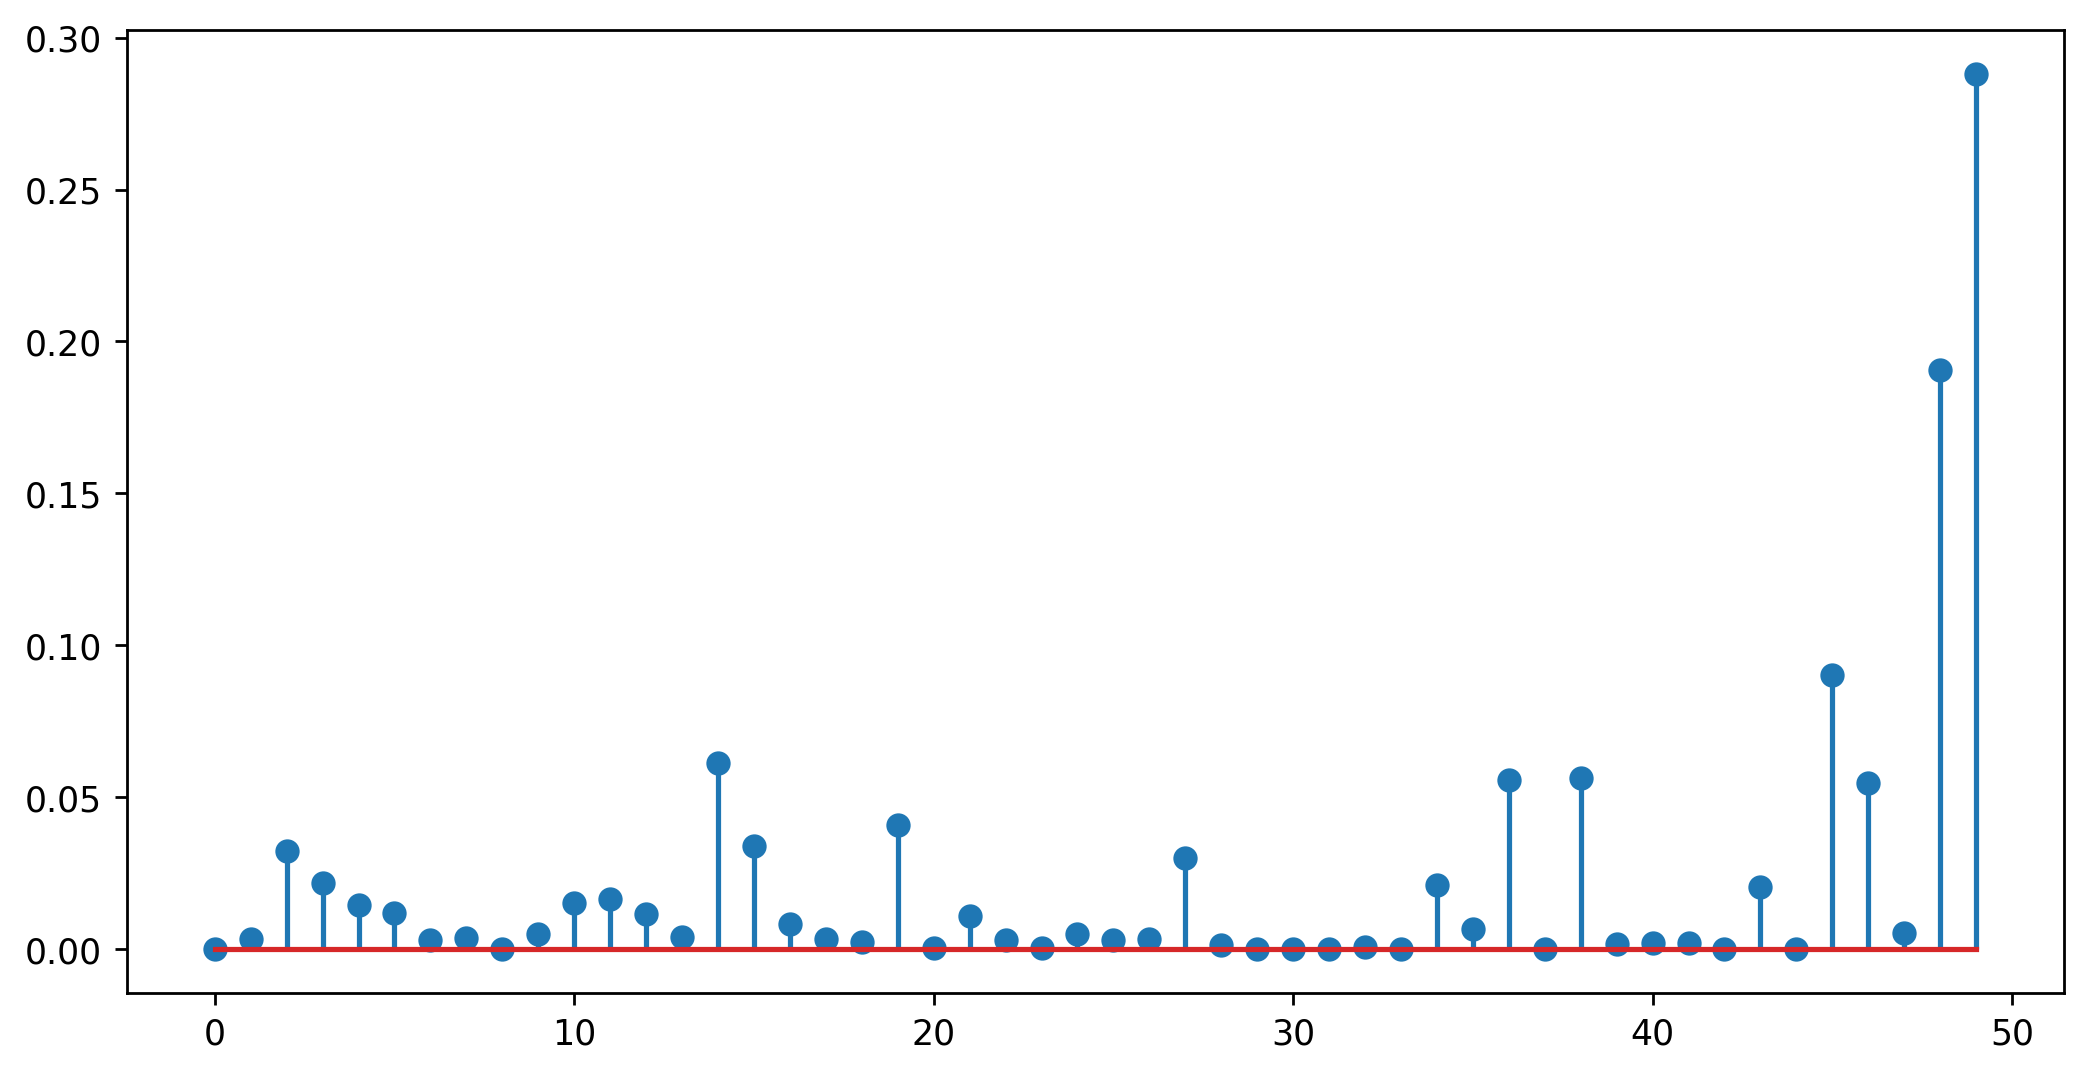

In [34]:
plt.stem(c)

In [35]:
from statsmodels.graphics.regressionplots import influence_plot

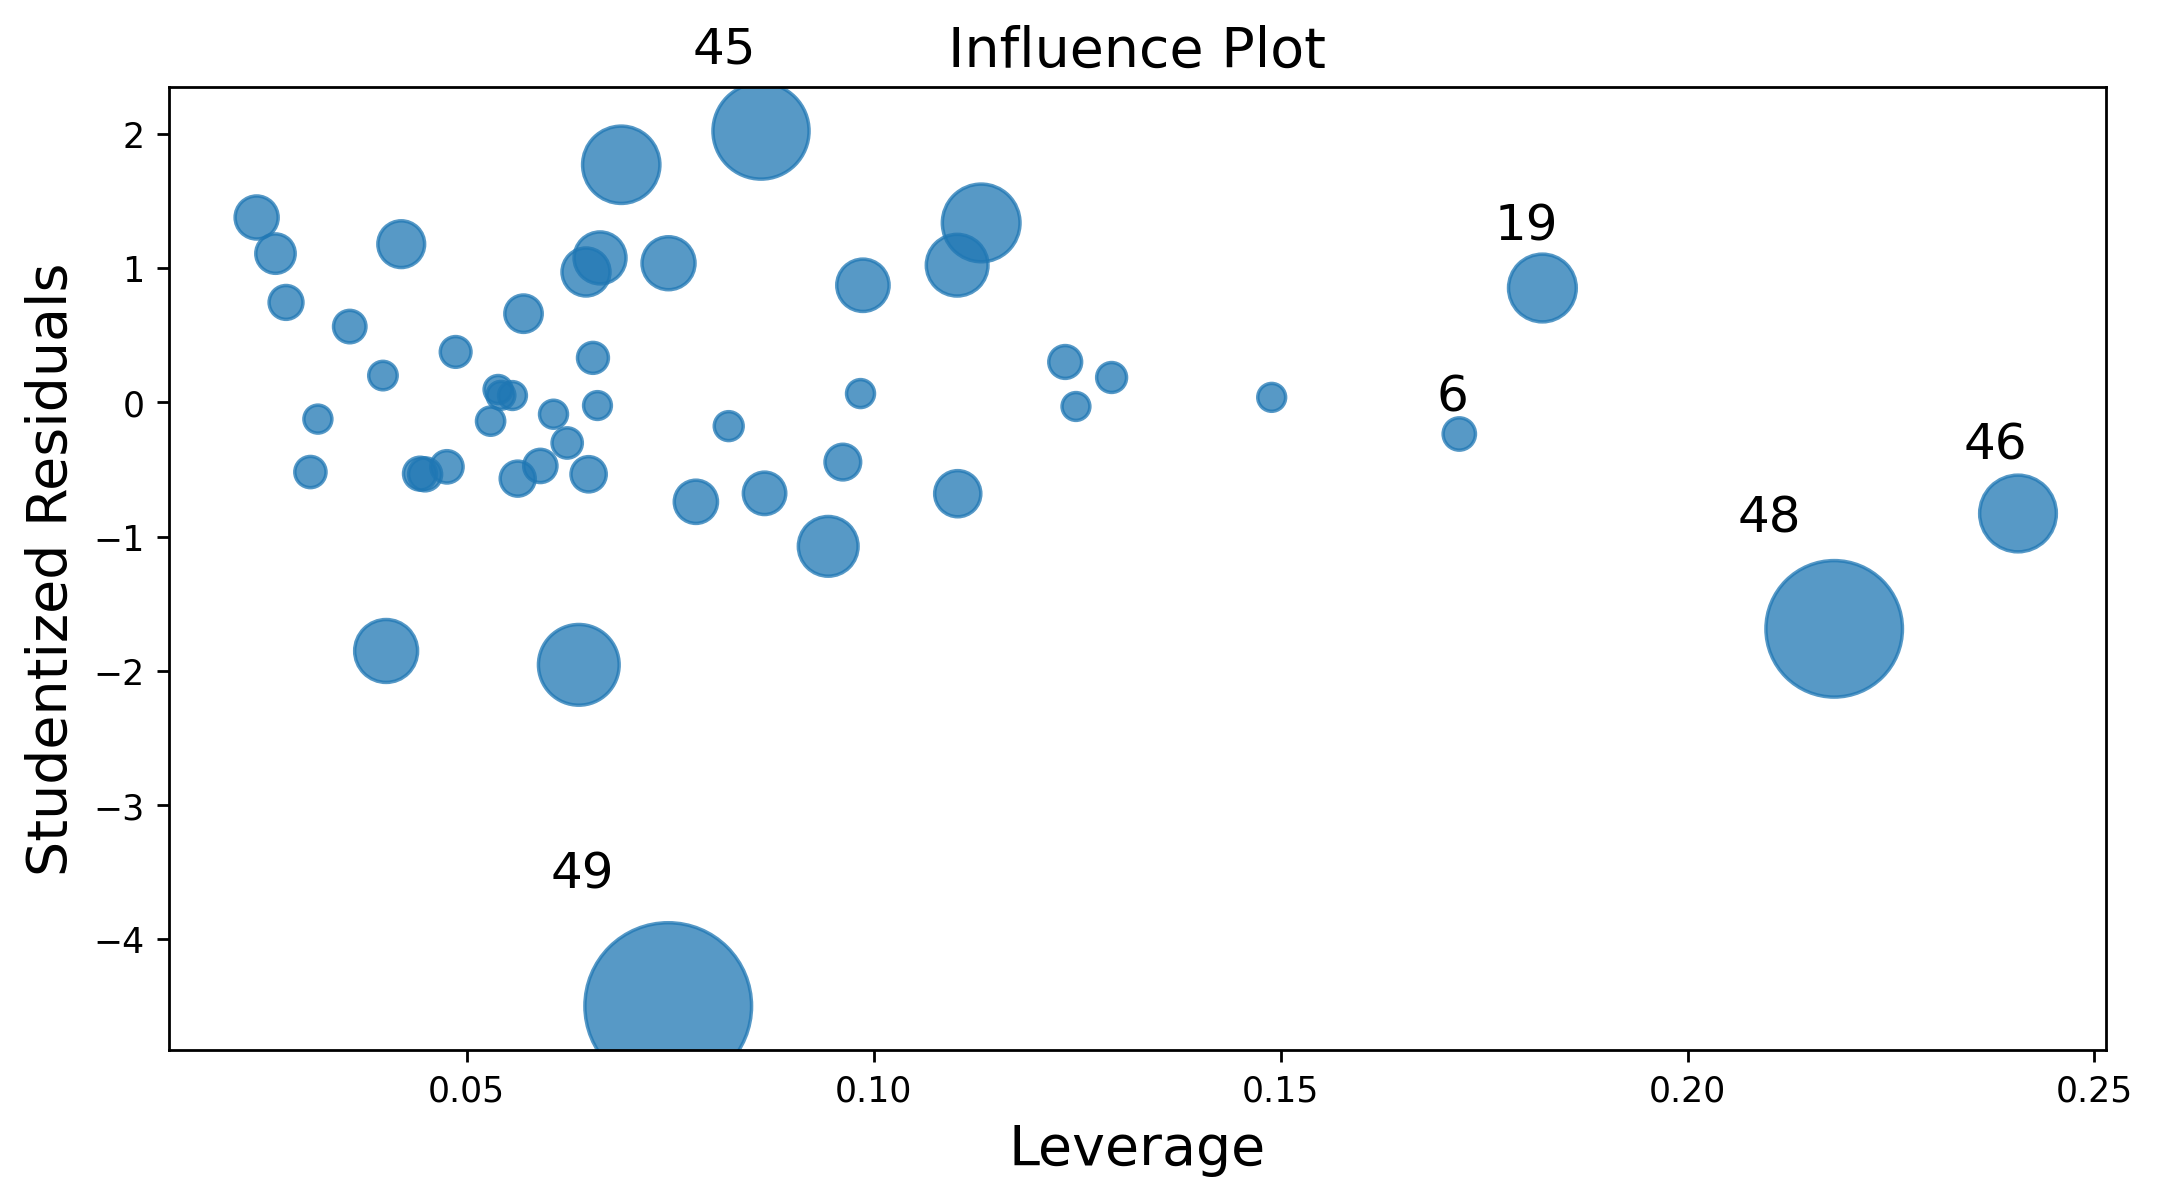

In [36]:
influence_plot(model);

In [37]:
np.argmax(c),np.max(c)

(49, 0.2880822927543263)

##### Since the value is <1 , we doesn't need to do the diagnostic process and finalize the model

In [38]:
(model.rsquared,model.aic)

(0.9507459940683246, 1058.7714985998055)

In [39]:
model.params

Intercept    50122.192990
RnD              0.805715
admin           -0.026816
marketing        0.027228
dtype: float64

### Prediction Values with the Model

In [40]:
newdf = pd.DataFrame({
    'RnD':[159851.51,142907.34,169347.70],
    'admin':[136897.10,11575.55,117891.85],
    'marketing':[406894.54,485684.10,498534.54]
})
newdf

,RnD,admin,marketing
0,159851.51,136897.10,406894.54
1,142907.34,11575.55,485684.10
2,169347.70,117891.85,498534.54


In [41]:
model.predict(newdf)

0    186324.882944
1    178178.616136
2    196980.930185
dtype: float64